## Imports 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get data


In [1]:
#Load Libraries and Create engine Connection

import pymysql
import pandas as pd
import numpy as np
import sqlalchemy
import gc
engine =sqlalchemy.create_engine(
        sqlalchemy.engine.url.URL.create(
        drivername="mysql+pymysql",
        username='Estimators',  # e.g. "my-database-user"
        password='Estimator2021',  # e.g. "my-database-password"
        host='34.77.88.127',  # e.g. "127.0.0.1"
        port=3306,  # e.g. 3306
        database='Housing_France',  # e.g. "my-database-name"
    ))

conn = engine.connect().execution_options(stream_results=True)

In [2]:
#Load Libraries and Create engine Connection

import pymysql
import pandas as pd
import numpy as np
import sqlalchemy
import gc

def get_data(querystring,chunk):
    engine =sqlalchemy.create_engine(
    sqlalchemy.engine.url.URL.create(
    drivername="mysql+pymysql",
    username='Estimators',  # e.g. "my-database-user"
    password='Estimator2021',  # e.g. "my-database-password"
    host='34.77.88.127',  # e.g. "127.0.0.1"
    port=3306,  # e.g. 3306
    database='Housing_France',  # e.g. "my-database-name"
    ))
    conn = engine.connect().execution_options(stream_results=True)
    frame = pd.DataFrame()
    for chunk_dataframe in pd.read_sql(
            querystring, conn, chunksize=chunk):
            print(f"Got dataframe w/{len(chunk_dataframe)} rows")
            frame= frame.append(chunk_dataframe)
            # ... do something with dataframe ...
            
    return frame

In [3]:
#Template for getting some data
df = get_data("""select * from data_working LIMIT 50000""", 1000)

Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got datafram

In [4]:
#Replace all the blank rows with np.NaN

for i in df.columns:
    df[i].replace(r'', np.nan, regex=True, inplace= True)

In [5]:
#Some Preprocessing
df2 = df.copy()
df2 = df2[df2['type_local']. notna()]
df2 = df2[df2['id_mutation']!= 'id_mutation']
df2 = df2[df2['type_local']== 'Maison']
columns = ['ancien_nom_commune','ancien_id_parcelle','ancien_code_commune','lot5_surface_carrez','lot4_surface_carrez','lot5_numero'
            ,'lot3_surface_carrez', 'numero_volume','lot4_numero','lot3_numero','adresse_suffixe']
df2.drop(columns=columns, inplace=True)

In [6]:
df.shape

(50000, 40)

In [7]:
df.head(2)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2016-1,2016-01-08,1,Vente,40000,77,NaN,RUE TONY REVILLON,0560,1750,...,Appartement,50,2,NaN,NaN,NaN,NaN,0,4.840606,46.304486
1,2016-2,2016-01-11,1,Vente,1677,5246,NaN,LES BROTTEAUX,B011,1160,...,Local industriel. commercial ou assimilé,0,0,S,sols,NaN,NaN,838,5.323666,46.040803


Make a copy of df

In [8]:
data = df.copy()

## Column : surface_terrain

In [10]:
data['surface_terrain'].unique()

array([   0,  838, 1151, ..., 2372, 4737, 2302])

In [11]:
data['surface_terrain'].value_counts()

0       23184
500       775
1000      401
800       157
600       152
        ...  
3278        1
1812        1
1890        1
2648        1
3634        1
Name: surface_terrain, Length: 2998, dtype: int64

# Select rows with NaN in 'surface_terrain'

In [15]:
def select_rows_with_nan_in_list_columns(df, col_name): #df : dataframe
      if len(col_name) == 1 :
        selected_rows = df[
                     df[col_name[0]].isnull() 
                     ]
      elif len(col_name) > 1:
        selected_rows = df[
                     df[col_name[0]].isnull() & \
                     df[col_name[1]].isnull() 
                     ]
      return selected_rows


df_test = select_rows_with_nan_in_list_columns(df = data,
                                         col_name= ['surface_terrain'])
df_test.shape


(0, 40)

In [16]:
len(data) - len(df_test) # len of data with one of both colums : 
# 'code_nature_culture', 'code_nature_culture_speciale'
#is NaN

50000

In [17]:
mask_columns = ['surface_terrain', 'surface_reelle_bati',
                'nombre_lots', 'numero_disposition',
                'valeur_fonciere']

df_test[mask_columns]

,surface_terrain,surface_reelle_bati,nombre_lots,numero_disposition,valeur_fonciere


# Drop rows with NaN in 'surface_terrain'

In [18]:
def drop_rows_with_nan_in_list_columns(df, col_name): #df : dataframe

    mod_df = df.dropna( how='all', subset=col_name)
  
    return mod_df


clean_data = drop_rows_with_nan_in_list_columns(df = data,
                          col_name= ['surface_terrain'])

clean_data.shape


(50000, 40)

In [19]:
mask_columns = ['id_mutation', 'type_local', 
                'nombre_lots', 'numero_disposition',
                 'surface_terrain', 'surface_reelle_bati',
                'valeur_fonciere']


clean_data[mask_columns]

,id_mutation,type_local,nombre_lots,numero_disposition,surface_terrain,surface_reelle_bati,valeur_fonciere
0,2016-1,Appartement,1,1,0,50,40000
1,2016-2,Local industriel. commercial ou assimilé,0,1,838,0,1677
2,2016-3,Local industriel. commercial ou assimilé,0,1,1151,3836,7915000
3,2016-4,Maison,0,1,1220,150,90000
4,2016-6,Maison,0,1,500,98,203700
...,...,...,...,...,...,...,...
995,2016-43169,Local industriel. commercial ou assimilé,1,1,0,47,840000
996,2016-43169,Local industriel. commercial ou assimilé,1,1,0,33,840000
997,2016-43169,Local industriel. commercial ou assimilé,1,1,0,42,840000
998,2016-43169,Local industriel. commercial ou assimilé,1,1,0,41,840000


In [20]:
clean_data['surface_terrain'].isnull().sum()

0

In [21]:
df_new = clean_data.drop_duplicates()
df_new[mask_columns]

,id_mutation,type_local,nombre_lots,numero_disposition,surface_terrain,surface_reelle_bati,valeur_fonciere
0,2016-1,Appartement,1,1,0,50,40000
1,2016-2,Local industriel. commercial ou assimilé,0,1,838,0,1677
2,2016-3,Local industriel. commercial ou assimilé,0,1,1151,3836,7915000
3,2016-4,Maison,0,1,1220,150,90000
4,2016-6,Maison,0,1,500,98,203700
...,...,...,...,...,...,...,...
995,2016-43169,Local industriel. commercial ou assimilé,1,1,0,47,840000
996,2016-43169,Local industriel. commercial ou assimilé,1,1,0,33,840000
997,2016-43169,Local industriel. commercial ou assimilé,1,1,0,42,840000
998,2016-43169,Local industriel. commercial ou assimilé,1,1,0,41,840000


In [22]:
df_new.shape

(47749, 40)

#Corelations with target column : valeur_fonciere

Correlations: Check correlation between variable :

*   surface_terrain

and
*  target variable : valeur_fonciere.



is there correlation between this variable and 'valeur_fonciere' ?

In [30]:
mask_columns = [ 
                'nombre_lots', 'numero_disposition',
                 'surface_terrain','surface_reelle_bati',
                'valeur_fonciere']

selected_data = df_new[mask_columns]
selected_data.head(2)

,nombre_lots,numero_disposition,surface_terrain,surface_reelle_bati,valeur_fonciere
0,1,1,0,50,40000
1,0,1,838,0,1677


<AxesSubplot:>

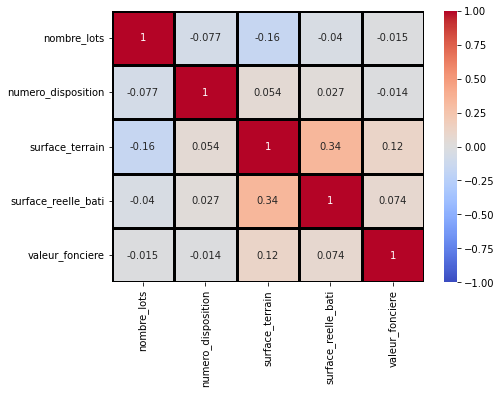

In [26]:
plt.figure(figsize=(7,5))

sns.heatmap(selected_data.corr(), annot = True,vmin=-1, vmax=1,
            center= 0,cmap= 'coolwarm',linewidths=3, linecolor='black')

# Correlation with more columns

Correlation as above, but here we add the column 'nombre_pieces_principales' 

In [28]:
mask_columns = [ 
                'nombre_lots', 'numero_disposition',
               'nombre_pieces_principales',
                 'surface_terrain','surface_reelle_bati',
                'valeur_fonciere']

selected_data_1 = df_new[mask_columns]
selected_data_1.head(2)

,nombre_lots,numero_disposition,nombre_pieces_principales,surface_terrain,surface_reelle_bati,valeur_fonciere
0,1,1,2,0,50,40000
1,0,1,0,838,0,1677


<AxesSubplot:>

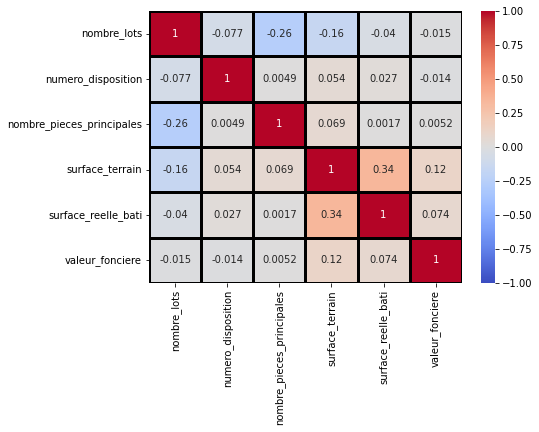

In [29]:
plt.figure(figsize=(7,5))

sns.heatmap(selected_data_1.corr(), annot = True,vmin=-1, vmax=1,
            center= 0,cmap= 'coolwarm',linewidths=3, linecolor='black')